# Simulation of Ito vs. backward Ito integrals

We simulate the Ito and backward Ito integrals of a Brownian motion w.r.t. itself.

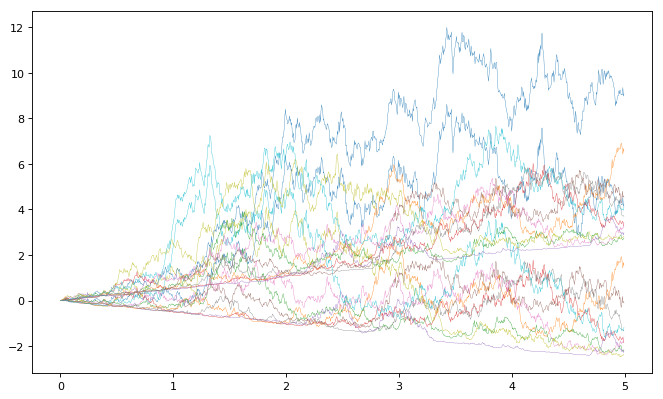

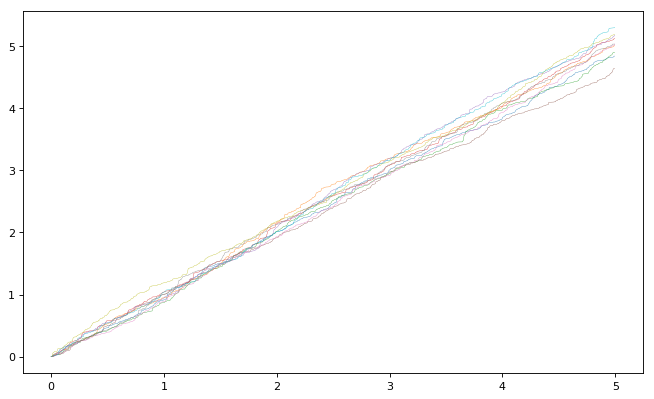

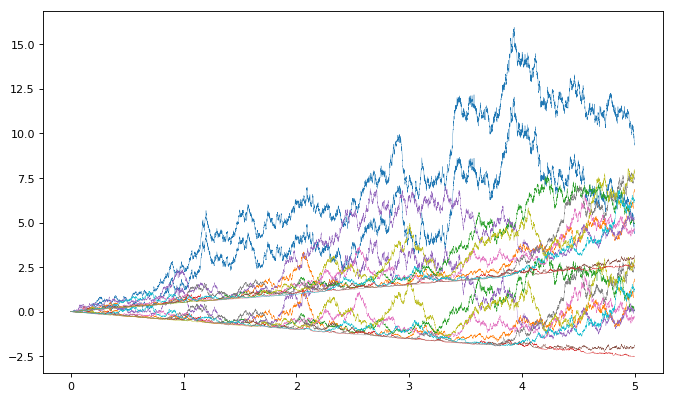

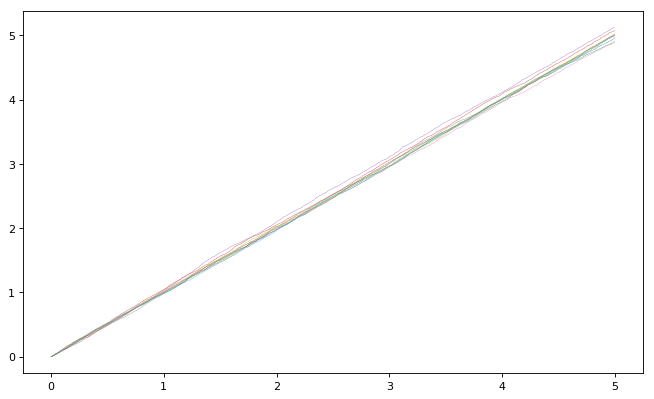

In [17]:
import numpy as np 
# makes numpy routines and data types available as np.[name of routine or data type]

import matplotlib.pyplot as plt 
# makes plotting command available as plt.[name of command]

tmax = 5.
# simulation of process from time 0 to tmax
stepslist = [1000,10000]
# produce simulations with step numbers chosen from steplist

for steps in stepslist:
    h = tmax/steps
    # stepsize for time discretization
    std = np.sqrt(h)
    # standard deviation for the distribution of each step

    k = 10
    # number of samples that will be simulated

    noise = np.random.randn(steps,k)*std
    # create a steps times k dimensional matrix of normal random numbers 
    # with variance h 


    bm = np.zeros((steps,k))
    itoint = np.zeros((steps,k))
    bwint = np.zeros((steps,k))
    # initialize the arrays for Brownian motion, Ito and backward Ito integral

    for n in range(steps-1):
        bm[n+1] = bm[n]+noise[n]
        itoint[n+1] = itoint[n]+bm[n]*noise[n]
        bwint[n+1] = bwint[n]+bm[n+1]*noise[n]

    t = np.arange(0,steps,1)*h
    # creates vector of time points

    plt.figure(figsize=(10,6), dpi=80)
    # sets size of plot
    plt.plot(t,itoint,linewidth=0.3)
    plt.plot(t,bwint,linewidth=0.3)
    # produces plots of Ito and backward Ito integral versus t
    plt.show()
    # output of plot 
    
    plt.figure(figsize=(10,6), dpi=80)
    # sets size of plot
    plt.plot(t,bwint-itoint,linewidth=0.3)
    # produces a plot of the difference between backward Ito and Ito integral
    plt.show()
    # output of plot 